# Final notebook

## 1. Getting some pre-requisites 

In [2]:
import pickle
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

#get the already trained model
model_ = load_model("Inception_V3_fully_tuned.hdf5")

#get the class labels for interpretation
with open("class_names.pkl",'rb') as f:
    class_names_ = pickle.load(f)

#to get the image paths for prediction
df=pd.read_csv('test_data_with_class_level_2.csv')
images_ = df['image_path'].values

## 2. Data pipeline function

In [7]:
#function which takes the image_path, model and class_names and gets the predicted class label

def pipeline(model , class_names, image_path):
    '''
    This function takes the model, class_names , image_path and predicts the top most likely class labels that
    the given image may belong to.
    '''
    #read and pre-process the image
    image_original = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image_original, (128, 128))
    image = np.expand_dims(image, axis=0)
    
    #make the predictions
    pred = model.predict(image)
    
    #get the top 4 likely class labels for the given image 
    predicted_labels=[]
    probabilities=[]
    for h in range(4):
        pred_index=np.argsort(pred[0])[-1-h]
        predicted_labels.append(class_names[pred_index])
        probabilities.append(pred[0][pred_index]*100)
    
    return predicted_labels,probabilities

## 3. Getting the predictions

In [10]:
import time

#get a random image path from the dataframe
lst=np.arange(len(images_))
ids=np.random.choice(lst, size = 1, replace = False)
image_path_ = images_[ids[0]]

#make the predictions
start_time=time.time()
predicted_labels,probabilities=pipeline(model_,class_names_,image_path_)
end_time=time.time()
print("time taken for prediction = ", end_time-start_time , " seconds")

time taken for prediction =  0.06199955940246582  seconds


## 4. Plot the given image and the predictions

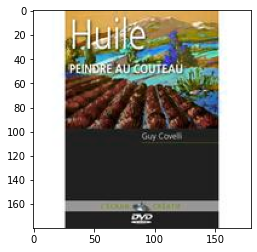

predicted_class_label : DVD  with probability :  29.166734218597412 %
predicted_class_label : Drawing Strip - Manga - Humor  with probability :  8.298250287771225 %
predicted_class_label : Gaming material  with probability :  7.879428565502167 %
predicted_class_label : Leisure - Games - Sport  with probability :  6.949546933174133 %


In [11]:
#plot the original image first
image_original = cv2.imread(image_path_, cv2.IMREAD_UNCHANGED)
plt.imshow(image_original)
plt.show()

#print the top 4 class labels 
for i in range(4):
    print('predicted_class_label :',predicted_labels[i], ' with probability : ', probabilities[i],'%')